# Проект: Принятие решений в бизнесе

+  Описание данных

Данные для первой части:


Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:


transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.


date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

-   Описание проекта

Крупный интернет магазин подготивил серию гипотез, для увеличения выручки. 
Следует их приоритезировать, запустить A/B-тест и проанализировать результаты.


## Приоритизация гипотез

* Импортируем библиотеки, запустим датасет, изучим данные

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
import datetime as dt
import warnings

In [2]:
pd.options.display.max_colwidth = 100
data = pd.read_csv('/datasets/hypothesis.csv')
data


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data['ICE'] = data['Confidence']*data['Impact']/ data['Efforts'] # проведем приор-цию метом ICE
display(data[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


После проверки на приоритезацию гипотез методом ICE, мы видим, что приоритетными являются гипотезы: Запустить акцию, дающую скидку на товар в день рождения; Добавить два новых канала привлечения трафика; Добавить форму подписки на все основные страницы.

In [4]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence']/ data['Efforts']
print(data[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending  = False))

                                                                                            Hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

После проверки на приоритезацию гипотез методом RICE, мы видим, что приоритетными являются гипотезы: Добавить форму подписки на все основные страницы;Добавить блоки рекомендаций товаров на сайт; Добавить два новых канала привлечения трафика.

На мой взгляд наиболее предпочтительной является гипотеза - Добавить форму подписки на все основные страницы. Она входит в тройку лидеров при методе приоритезации ICE и при этом у нее существеено выше охват. Так же можно взять гипотезу: Добавить два новых канала для привлечения трафика. Обе эти гипотезы входят в тройку лидеров в обоих случаях.

* Мы можем обратить внимание на то, что при использовании метода RICE картинка по лидерам меняется, т.к. данный метод учитывает охват пользователей. Это существенный момент для выбора гипотезы.Шансы на успех при большем кол-ве пользователей повышаются.  

## Анализ A/B-теста

* У нас есть результаты проведенного исследования, нам следует их проанализировать

In [5]:
orders = pd.read_csv('/datasets/orders.csv') # познакомимся с таблицами
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
display('Явных дупликатов:',orders.duplicated().sum()) # проверим на дупликаты
orders.info()

'Явных дупликатов:'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
visitors.duplicated().sum()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])  # переведом дату в надлежащую форму
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверили таблицы на наличие явных дупликатов, отсутствие каких то данных, проверили тип данных, перевели дату в необходимый для дальнейшей работы формат

In [12]:

orders = orders.rename(columns = {'transactionId': 'order', 'visitorId':'user'}) 

orders.head() # для удобства переименуем некоторые столбцы

,order,user,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим количество участников в обеих группах

In [13]:
a = visitors[visitors['group'] == 'A']['visitors'].sum()
display(a)
b = visitors[visitors['group'] == 'B']['visitors'].sum()
display(b)
print("{:.3%}".format((b-a)/a))

18736

18916

0.961%


Количество незначительно отличается.

Сделаем проверку на наличие в таблице  "подглядывающих"

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   order    1197 non-null   int64         
 1   user     1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
ord_a = orders[orders['group'] == 'A']
ord_b = orders[orders['group'] == 'B']
ord_c = ord_a.merge(ord_b, on  = 'user')['user'].unique()
len(ord_c)

58

Найдены 58 пользователей которые состоят в обех группах. Т.к. данные по ним будут искажать реальную картину мы их удаляем

In [16]:
orders = orders[~orders['user'].isin(ord_c)] 
orders.info() # проверяем после удаления


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   order    1016 non-null   int64         
 1   user     1016 non-null   int64         
 2   date     1016 non-null   datetime64[ns]
 3   revenue  1016 non-null   int64         
 4   group    1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Провели небольшую предоработку данных:

проверили на дупликаты

перевели дату в нужный для работы формат

переименовали некоторые столбцы

нашли группу пользователей состоящих в двух группах сразу. Удалили их, чтобы они не искажали нам результаты исследования

проверили размеры обеих групп (разница незначительная)

Приступим к анализу

### Построим график кумулятивной выручки по группам.

In [17]:
# создадим кумулятивную таблицу заказов
ord_agreg = orders.apply(lambda x: orders[np.logical_and(\
                                                         orders['date']<= x['date'],\
                                                         orders['group'] == x['group'])]\
                         .agg({'date': 'max','group': 'max','order': 'nunique',\
                               'user': 'nunique','revenue': 'sum'}),axis = 1)\
.sort_values(by = ['date', 'group']).drop_duplicates()
ord_agreg


,date,group,order,user,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# кумулятивный датафрейм по визитам
visit_agreg = visitors.apply(lambda x: visitors[np.logical_and(\
                                                         visitors['date']<= x['date'],\
                                                         visitors['group'] == x['group'])]\
                         .agg({'date': 'max','group': 'max','visitors': 'sum'}),axis = 1)\
.sort_values(by = ['date', 'group'])
visit_agreg

,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845
...,...,...,...
59,2019-08-29,B,17708
29,2019-08-30,A,18037
60,2019-08-30,B,18198
30,2019-08-31,A,18736


In [20]:
cum_data = ord_agreg.merge(visit_agreg, left_on = ['date', 'group']\
                           , right_on = ['date', 'group']) # объединяем обе таблицы
cum_data

,date,group,order,user,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [21]:
# кум-ые выручки в гр.А и гр. В
cum_rev_a = cum_data[cum_data['group'] == 'A'][['date', 'revenue', 'order']] 
cum_rev_b = cum_data[cum_data['group'] == 'B'][['date', 'revenue', 'order']]

''

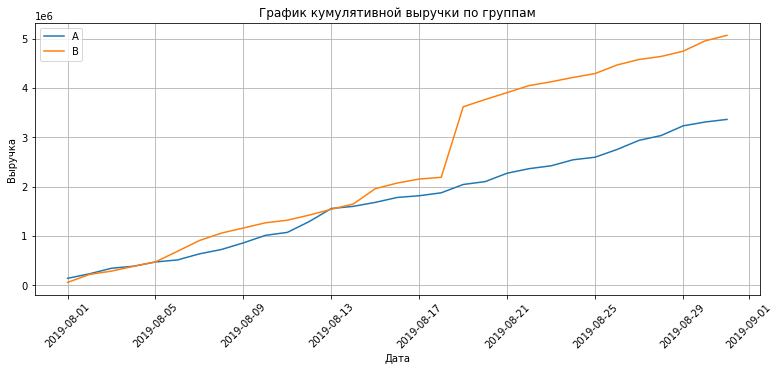

In [22]:
# строим график
plt.figure(figsize=(13,5))
plt.plot(cum_rev_a['date'], cum_rev_a['revenue'], label = 'A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue'], label = 'B')
plt.xticks(rotation = 45)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
;


Выручка увеличивается во время проведения теста в обеих группах. Примерно через две недели сегмент В вырывается вперед по показателям кумулятивной выручки по группам и продолжает лидировать до конца проведения теста. Сегмент А распределен достаточно равномерно, а вот в сегменте В наблюдаются некоторые перепады.

### Построим график кумулятивного среднего чека по группам.

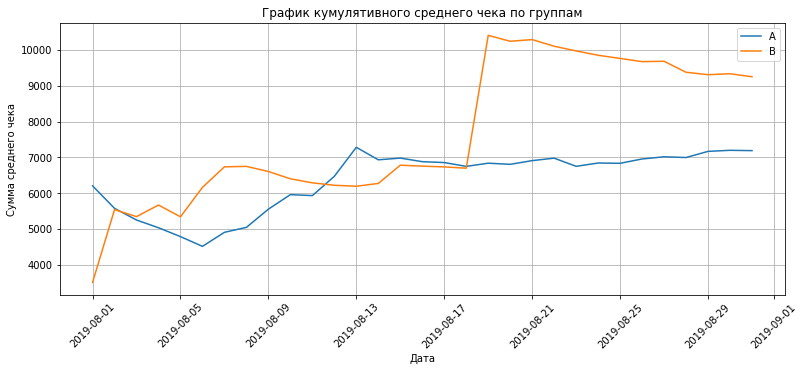

In [23]:
plt.figure(figsize=(13,5))
plt.plot(cum_rev_a['date'], cum_rev_a['revenue']/cum_rev_a['order'], label = 'A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue']/cum_rev_b['order'], label = 'B')
plt.xticks(rotation = 45)
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.legend();

Средний чек кумулятивной выручки в группе В выше чем у группы А и он резко поднимается примерно в середине теста,
затем наблюдается некоторый спад. При этом он остается на более высоком уровне чем у второй группы. Всплески сигнализирует  возможно о резком скачке количества заказов, либо о высокой цене заказа. Тем ни менее рост среднего чека у гр. А стабилзировался, а у гр. В наблюдается небольшое понижение.

###  Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [24]:
merge_cum_rev = cum_rev_a.merge(cum_rev_b, left_on = 'date', right_on = 'date', how = 'left',\
                               suffixes = ['A', 'B'])
merge_cum_rev.head() # объединяем кум-ные таблицы

,date,revenueA,orderA,revenueB,orderB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


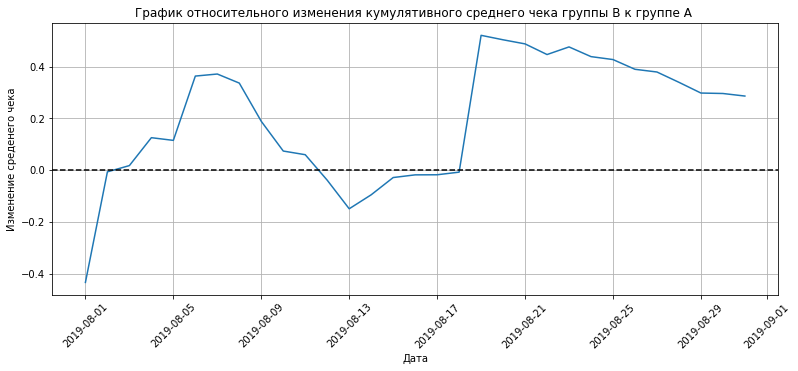

In [25]:
plt.figure(figsize=(13,5))
plt.plot(merge_cum_rev['date'], (merge_cum_rev['revenueB']/merge_cum_rev['orderB'])/\
         (merge_cum_rev['revenueA']/merge_cum_rev['orderA'])-1)
plt.grid()
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A ')
plt.xlabel('Дата')
plt.ylabel('Изменение среденего чека');


На графике вновь наблюдаются скачки. Средний чек группы В относительно группы А подвержен частым и резким изменениям. Вначале теста группа В проигрывала по показателям, а затем средний чек вырос относительно группы А. В районе даты 13-08-2019 наблюдается падение и затем вновь подъем. Следует задуматься  о проверке на выбросы

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

In [26]:
cum_data['conversion'] = cum_data['order']/ cum_data['visitors'] 
cum_data.head() # добавляем столбец с показателем конверсии

,date,group,order,user,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


In [27]:
cum_data_a = cum_data[cum_data['group'] == 'A']
cum_data_b = cum_data[cum_data['group'] == 'B']

display(cum_data['date'].max()) # определяем пограничные даты теста
cum_data['date'].min()


Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

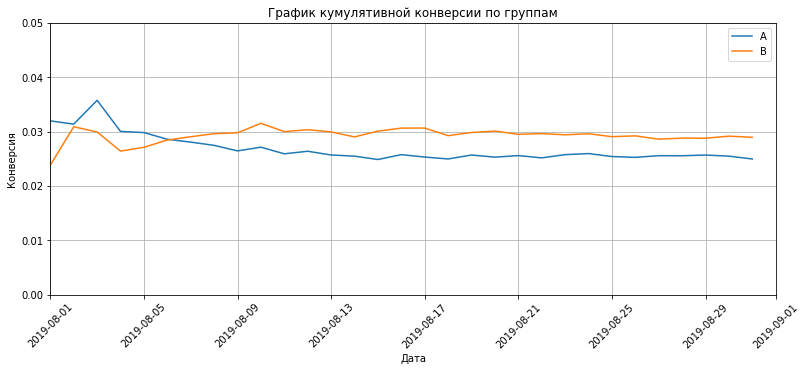

In [28]:
plt.figure(figsize=(13,5))
plt.plot(cum_data_a['date'], cum_data_a['conversion'], label = 'A')
plt.plot(cum_data_b['date'], cum_data_b['conversion'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

Графики колебались в начале проведения теста, но затем конверсия группы В стала выше при этом конверсия в  обеих группах распределена достаточно равномерно относительно друг друга. К концу проведения теста конверсия на графиках почти стабилизировалась.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [29]:
merge_cum_conv = cum_data_a[['date', 'conversion']]\
.merge(cum_data_b[['date', 'conversion']], left_on = 'date', right_on = 'date'\
                                  , how = 'left', suffixes = ['A', 'B'])
merge_cum_conv.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


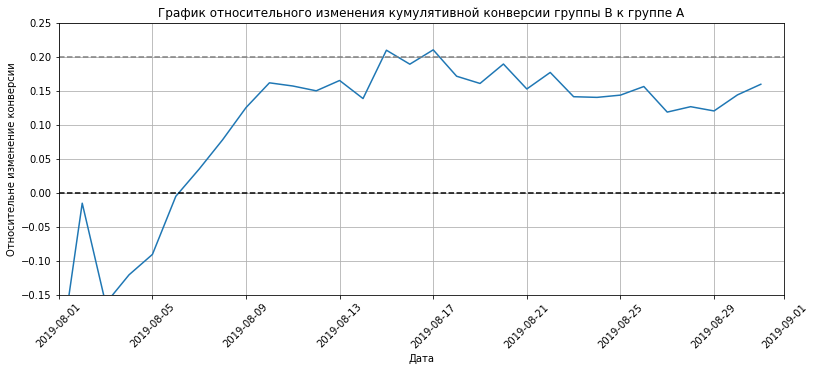

In [30]:
plt.figure(figsize=(13,5))
plt.plot(merge_cum_conv['date'], merge_cum_conv['conversionB']/\
         merge_cum_conv['conversionA']-1)
plt.xticks(rotation = 45)
plt.grid()
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.2, color = 'grey', linestyle = '--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительне изменение конверсии')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.15, 0.25]);

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. 
В целом отношение конверсии гр.В к гр.А достаточно неплохое, но сейчас делать какие-либо выводы по тесту нельзя. Стоит проанализировать аномалии, возможно, они изменят картину. Снова обращаем внимание на скачок в районе 13-08-2019

### Построим точечный график количества заказов по пользователям. 

In [31]:
ord_us = orders.groupby('user', as_index = False).agg({'order':'nunique'})
ord_us.head()

,user,order
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


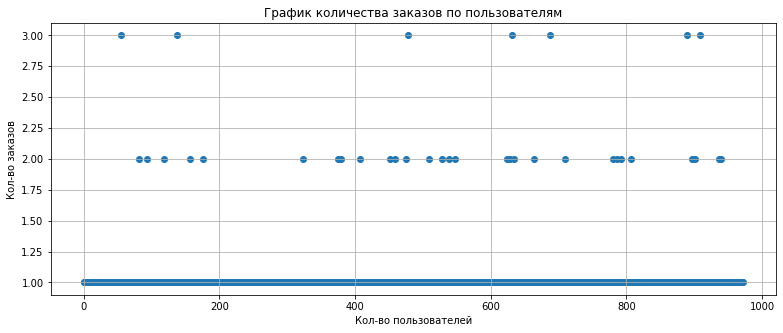

In [32]:
x_values = pd.Series(range(0, len(ord_us['order'])))
plt.figure(figsize=(13,5))
plt.scatter(x_values, ord_us['order'])
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов');

Пользователей сделавших заказ больше 2 раз мало. Надо посчитать перцентили, чтобы сделать окончательные выводы по аномалиям.

In [33]:
np.percentile(ord_us['order'], [95, 99])

array([1., 2.])

5% пользователей сделали больше 1 заказа и только 1% сделали больше 2 заказов 

### Построим точечный график стоимости заказов

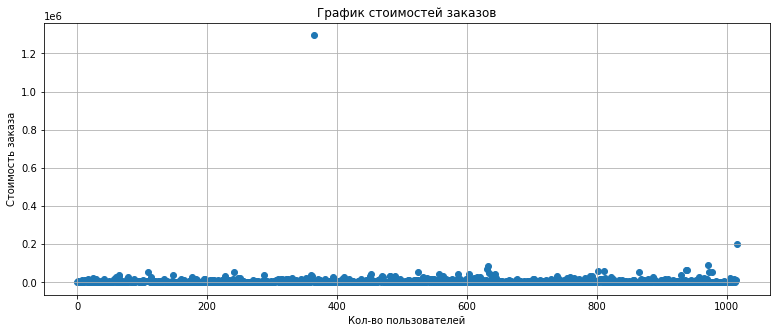

In [34]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(13,5))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказа');

Мы видим, что основная масса заказов не превышает 100 000 при этом есть заказ выше 1,2 млн. Что может кардинально менять картину теста. Посмотрим поближе

In [35]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

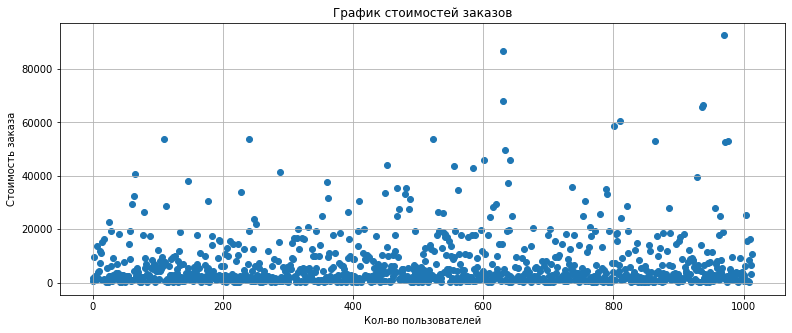

In [36]:
usual_ord = orders[orders['revenue'] < 100000]
x_values = pd.Series(range(0, len(usual_ord)))
plt.figure(figsize=(13,5))
plt.scatter(x_values, usual_ord['revenue'])
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказа');

На этом графике наглядно видно, что основная масса заказов до 20 000

Посчитаем перцентили, чтобы сделать окончательные выводы по выбросам.

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Только 5% пользователей делают заказы на сумму выше 26785 и только 1% на сумму выше 53 904

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

В первую очередь соберем таблицу с всеми данными по визитам и заказам вместе с кумулятивными показателями.

In [38]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [39]:
orders.head()

,order,user,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


#### Сформулируем гипотезы.

Н0: различий в среднем количестве заказов между группами нет. 

Н1 (Альтернативная): различия в среднем количестве заказов между группами есть.

In [40]:
ord_us_a = orders[orders['group'] == 'A'].groupby('user', as_index = False)\
.agg({'order':'nunique'}) # собирем заказы по пользователям в группах
ord_us_a.head()

,user,order
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [41]:
ord_us_b = orders[orders['group'] == 'B'].groupby('user', as_index = False)\
.agg({'order':'nunique'})
ord_us_b.head()

,user,order
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [42]:
length_a = pd.Series(0, index=np.arange(visitors[visitors['group'] =='A']['visitors']\
                             .sum() - len(ord_us_a['order'])), name='orders')
length_b = pd.Series(0, index=np.arange(visitors[visitors['group'] =='B']['visitors']\
                             .sum() - len(ord_us_a['order'])), name='orders')

In [43]:
#pd.Series(0, index=np.arange(df['visitors_a'].sum() - len(ord_us_a['order'])), name='orders')
  

In [44]:
sampleA = pd.concat([ord_us_a['order'], length_a],axis=0)
sampleB = pd.concat([ord_us_b['order'], length_b],axis=0)


In [45]:
display('p_value:"{0:.3f}"'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
display('Статистическая значимость различий в среднем количестве заказов на посетителя между группами \
по «сырым» данным:'"{0:.3f}".format(sampleB.mean()/ sampleA.mean()-1))


'p_value:"0.013"'

'Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:0.155'

p_value меньше 0.05 соответственно различие в данных группах в приросте заказа на посетителя есть .

Более того группа В выигрывает на 16%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы 

Н0:  статистически значимых различий в среднем чеке между группами нет.

Н1(альтернативная): статистически значимые различия есть.



In [46]:
print('p_value:'"{0:.3f}".format(st.mannwhitneyu(orders[orders['group'] =='A']['revenue'],\
                                          orders[orders['group'] == 'B']['revenue'])[1]))
print('Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:'\
"{0:.3f}".format(orders[orders['group'] =='B']['revenue'].mean()/\
                       orders[orders['group'] == 'A']['revenue'].mean()-1))

p_value:0.829
Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:0.287


p_value , больше 0.05 соответственно существенных различий в среднем чеке нет, при этом прирост среднего чека в группе В выше чем в группе А почти на 29%

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Выше мы выяснили, что пользователей совершивших больше 2 заказов меньше одного процента , а также, что стоимость заказа  выше 53904 так же только у 1%. Создадим таблицу содержащую эти заказы.

In [47]:
orders_perc = np.percentile(ord_us['order'], [99]).item()


In [48]:
orders_to_much = pd.concat([ord_us_a[ord_us_a['order']> orders_perc]\
                            , ord_us_b[ord_us_b['order']> orders_perc]], axis = 0)['user']                            
orders_to_much

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
33      249864742
347    2742574263
Name: user, dtype: int64

In [49]:
revenue_perc= np.percentile(orders['revenue'], [99]).item()

In [50]:
sum_to_much = pd.concat([orders[orders['revenue']> revenue_perc ],\
                         orders[orders['revenue']> revenue_perc]]\
                        , axis = 0)['user']
                                        
sum_to_much

425     1920142716
743     4133034833
744      888512513
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
425     1920142716
743     4133034833
744      888512513
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: user, dtype: int64

In [51]:
abnormal = pd.concat([orders_to_much, sum_to_much], axis = 0).drop_duplicates().sort_values()
display(abnormal)
abnormal.shape[0] # собираем таблицу с данными которые искажают результаты

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
Name: user, dtype: int64

16

Выяснили что аномальных  пользователей всего 16. Можем приступать к изучению статистической значимости по "очищенным " данным исключив данную группу из исследования

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сформулируем гипотезы 

Н0:  статистически значимых различий в кол-ве заказов на посетителя по "очищенным" данным между группами нет.

Н1(альтернативная): статистически значимые различия есть. 

In [52]:
orders_a_filt = ord_us_a[~ord_us_a['user'].isin(abnormal)]
orders_b_filt = ord_us_b[~ord_us_b['user'].isin(abnormal)] # исключаем из данных аномалии


In [53]:
sampleA_filt = pd.concat([orders_a_filt['order'],pd.Series(0, index=np.arange\
                (visitors[visitors['group'] =='A']['visitors'].sum()- len(orders_a_filt['order'])), name='orders')],axis=0)
sampleB_filt = pd.concat([orders_b_filt['order'],pd.Series(0, index=np.arange\
                (visitors[visitors['group'] =='B']['visitors'].sum()- len(orders_b_filt['order'])), name='orders')],axis=0)

In [54]:
print('p_value:'"{0:.3f}".format(st.mannwhitneyu(sampleA_filt, sampleB_filt)[1]))
print('Cтатистическую значимость различий в среднем количестве заказов на посетителя \
между группами по «очищенным» данным:' "{0:.3f}".format(sampleB_filt.mean()/\
                                                        sampleA_filt.mean()-1))

p_value:0.007
Cтатистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:0.189


Так же как и по "сырым" данным различия есть, p_value < 0.05. И выигрыш группы В составляет 19%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезы 

Н0:  статистически значимых различий в среднем чеке между группами по "очищенным" данным нет.

Н1(альтернативная): статистически значимые различия есть.

In [55]:
orders_filt = orders[~orders['user'].isin(abnormal)] # исключаем abnormal  из исследования

In [56]:
print('p_value:'"{0:.3f}".format(st.mannwhitneyu(orders_filt[orders_filt['group'] =='A']['revenue'],\
                                          orders_filt[orders_filt['group'] == 'B']['revenue'])[1]))
print('Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:'\
      "{0:.3f}".format(orders_filt[orders_filt['group'] =='B']['revenue'].mean()/\
                       orders_filt[orders_filt['group'] == 'A']['revenue'].mean()-1))

p_value:0.788
Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:-0.032


Результаты по статистической значимости среднего чека  по группам по «очищенным» данным говорят о том, что различий нет p_value > 0.05. Интересная картина с ростом среднего чека. В данном исследовании у группы В чек ниже на 3% чем у группы А. Это значительное искажение которое нам дали аномалии при первоначальных расчетах 

# Вывод

В результате проведенного исследования рекомендуется присвоить победу группе В и тест остановить . Все показатели данной группы выше относительно группы А. И хоть и заметны колебания показателей по графикам в начале проведения тестирования к концу исследования все стабилизируется.  



 
 - Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным у группы В 16% относительно группы А
    
 - Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным выше на 29% 
  
 - Cтатистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» выше на 19%
    
 - И только статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным ниже на 3 % чем у группы А
  
 - В обеих группах идет рост показателей, но показатели группы В выше чем у группы А
    
 - Рекомендую все же тест остановить и присвоить победу группе В

